In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
from configure import consumer_key, consumer_secret, access_token, access_token_secret
import time
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())

In [2]:
target_user = []
shopping = 'y'
while shopping == "y":
    user_choice = (f'@{input("Which twitter profile would I like to generate vader analysis for?")}')
    target_user.append(user_choice)
    shopping = input("Would you like my account to tweet out another Vader Analysis Graph?: (y)es or (n)o? ")


Which twitter profile would I like to generate vader analysis for?drvox
Would you like my account to tweet out another Vader Analysis Graph?: (y)es or (n)o? y
Which twitter profile would I like to generate vader analysis for?ClareMalone
Would you like my account to tweet out another Vader Analysis Graph?: (y)es or (n)o? y
Which twitter profile would I like to generate vader analysis for?smotus
Would you like my account to tweet out another Vader Analysis Graph?: (y)es or (n)o? n


In [3]:


# Target User Accounts
target_user = []
shopping = 'y'
while shopping == "y":
    user_choice = (f'@{input("Which twitter profile would I like to generate vader analysis for?")}')
    target_user.append(user_choice)
    shopping = input("Would you like my account to tweet out another Vader Analysis Graph?: (y)es or (n)o? ")


# List for dictionaries of results
    results_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_texts = []
    time_stamp= []
    user_name= []

# Loop through each user
    for user in target_user:


  
    # Loop through 10 pages of tweets (total 200 tweets)
        for x in range(1, 26):

        # Get all tweets from home feed
            public_tweets = api.user_timeline(user, page=x,tweet_mode='extended')
    
        # Loop through all tweets
            for tweet in public_tweets:
            
        #Append tweet_text list to read the tweets:
                tweet_texts.append(tweet["full_text"])
                time_stamp.append(tweet["created_at"])
                user_name.append(tweet["user"]["screen_name"]) 
                

        # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["full_text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

            # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                df = pd.DataFrame(
                {'User Name': user_name,
                'Time Stamp': time_stamp,
                'Text of Tweet': tweet_texts,
                'Compound Score':compound_list,
                'Positive Score':positive_list,
                'Neutral Score': neutral_list,
                'Negative Score':negative_list
     
                })
                       
                df= df.reset_index()
                df["Tweets Ago"] = df["index"]+1
                    
                users = []
                for user, df_user in df.groupby('User Name',sort=False):
                    users.append(df_user)

                for i in range(len(users)):
                    users[i]["Tweets Ago"] = users[i]["Tweets Ago"]-500*i
                
   


Which twitter profile would I like to generate vader analysis for?smotus
Would you like my account to tweet out another Vader Analysis Graph?: (y)es or (n)o? y
Which twitter profile would I like to generate vader analysis for?drvox
Would you like my account to tweet out another Vader Analysis Graph?: (y)es or (n)o? y
Which twitter profile would I like to generate vader analysis for?ClareMalone
Would you like my account to tweet out another Vader Analysis Graph?: (y)es or (n)o? n


In [4]:
def GraphTweet():
    for df in users:
        fig, ax = plt.subplots()
        rects2 = ax.plot(df['Tweets Ago'], df['Compound Score'], marker="o",label=str(df.iloc[1,1]), alpha=0.75)
        ax.set_title(f'Vader Analysis from the tweets of {df.iloc[1,1]}!')
        ax.set_xlabel("Tweets Ago")
        ax.set_ylabel("Tweet Polarity")
        ax.set_xlim(501, 0)
        ax.set_ylim(-1, 1.2)
        ax.legend(loc='upper left')
        ax.grid()
        ax.grid()
        fig.tight_layout()
        fig.set_size_inches(10, 9)
        plt.savefig(f'{df.iloc[1,1]} Vader Analysis.png')
        fig.show()
        file = (f'{df.iloc[1,1]} Vader Analysis.png')
        imagePath = file
        status = f'Vader Analysis from @{df.iloc[1,1]}!'
        api.update_with_media(imagePath, status)
        print("Tweeted Succesfully!")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


TweepError: [{'message': 'Application cannot perform write actions. Contact Twitter Platform Operations through https://support.twitter.com/forms/platform', 'code': 261}]

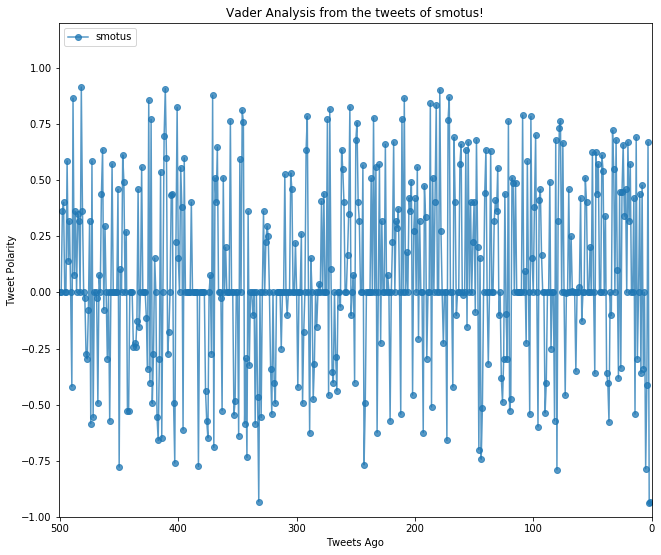

In [5]:
while(True):
    GraphTweet()
    time.sleep(3600)

